In [ ]:
import os
import glob
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch
import hdbscan
from sklearn.metrics import silhouette_score

In [ ]:
# Load the ResNet50 model pre-trained on ImageNet
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
def extract_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        features = model.predict(img_array)
        return features
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None

In [ ]:
# Extract features for all images in the folder
folder_path = 'C:/Users/okori/OneDrive/Desktop/flowers/flowers'
image_formats = ['*.png', '*.jpg', '*.jpeg', '*.bmp']

In [ ]:
# Collect all image paths with the specified formats
image_paths = []
for fmt in image_formats:
    image_paths.extend(glob.glob(os.path.join(folder_path, fmt)))

print(f"Found {len(image_paths)} images.")

In [ ]:
# Extract features and filter out any None values
features = []
valid_image_paths = []
for img_path in image_paths:
    feature = extract_features(img_path)
    if feature is not None and feature.size > 0:
        features.append(feature)
        valid_image_paths.append(img_path)
    else:
        print(f"No features extracted for image {img_path}")
# Convert the list of features to a numpy array
if features:
    features = np.array(features).reshape(len(features), -1)
    print(f"Extracted features shape: {features.shape}")

    # Optional: Dimensionality reduction with PCA
    pca = PCA(n_components=50)
    reduced_features = pca.fit_transform(features)

    # Clustering with K-Means
    num_clusters = 3  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(reduced_features)

    # Get cluster labels for K-Means
    kmeans_labels = kmeans.labels_

    # Clustering with BIRCH
    birch = Birch(n_clusters=num_clusters)
    birch.fit(reduced_features)

    # Get cluster labels for BIRCH
    birch_labels = birch.labels_

    # Clustering with HDBSCAN
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=num_clusters)
    hdbscan_labels = hdbscan_clusterer.fit_predict(reduced_features)

    # Create folders for each cluster and save images in their respective clusters
    def save_images_to_clusters(cluster_labels, algorithm_name):
        base_folder = f"{algorithm_name}_clusters"
        os.makedirs(base_folder, exist_ok=True)
        
        for img_path, label in zip(valid_image_paths, cluster_labels):
            cluster_folder = os.path.join(base_folder, f"cluster_{label}")
            os.makedirs(cluster_folder, exist_ok=True)
            img_name = os.path.basename(img_path)
            dest_path = os.path.join(cluster_folder, img_name)
            shutil.copy(img_path, dest_path)  # Use copy instead of rename

    save_images_to_clusters(kmeans_labels, "KMeans")
    save_images_to_clusters(birch_labels, "BIRCH")
    save_images_to_clusters(hdbscan_labels, "HDBSCAN")

else:
    print("No valid features extracted from images.")


Found 3669 images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━

c:\Users\okori\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_images_from_subfolders(folder_path, num_images=3):
    # Iterate through each subfolder in the given folder
    for subdir, _, files in os.walk(folder_path):
        # Filter out image files (assuming common image formats)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        
        # Select the first 'num_images' images from the subfolder
        selected_images = image_files[:num_images]
        
        if selected_images:
            # Plot each selected image in a row
            fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
            for ax, image_file in zip(axes, selected_images):
                image_path = os.path.join(subdir, image_file)
                img = Image.open(image_path)
                img = img.resize((224, 224))  # Resize the image to 224x224
                ax.imshow(img)
                ax.set_title(f"{image_file}")
                ax.axis('off')
            
            # Display the row of images
            plt.suptitle(f"Images from {subdir}")
            plt.show()


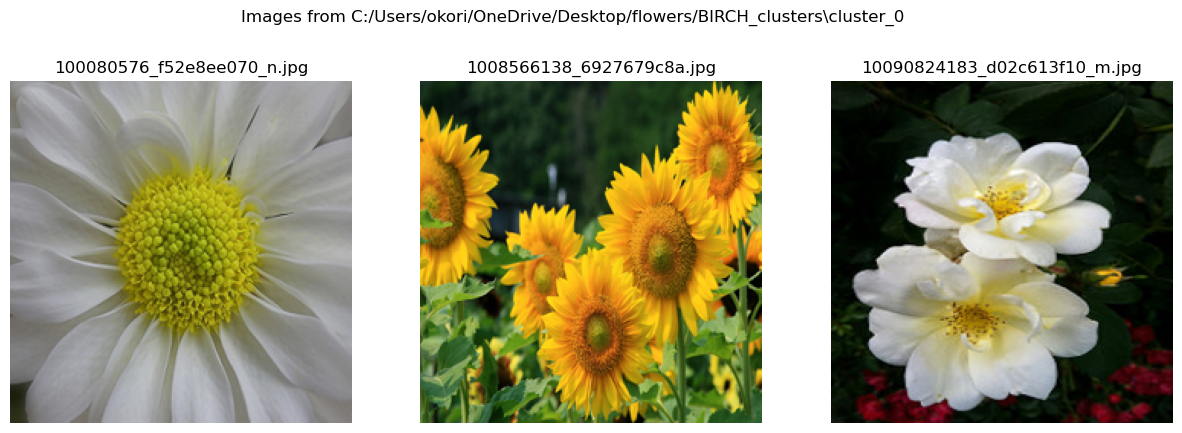

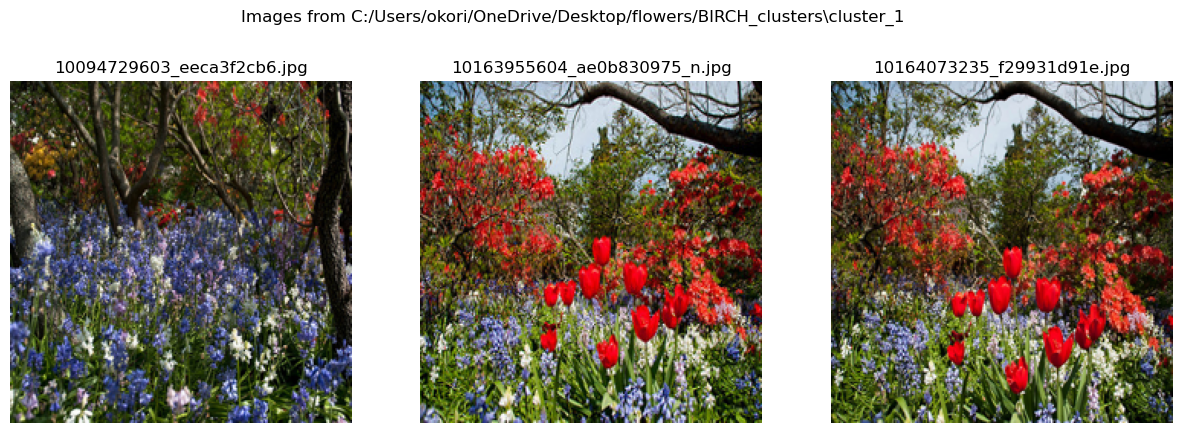

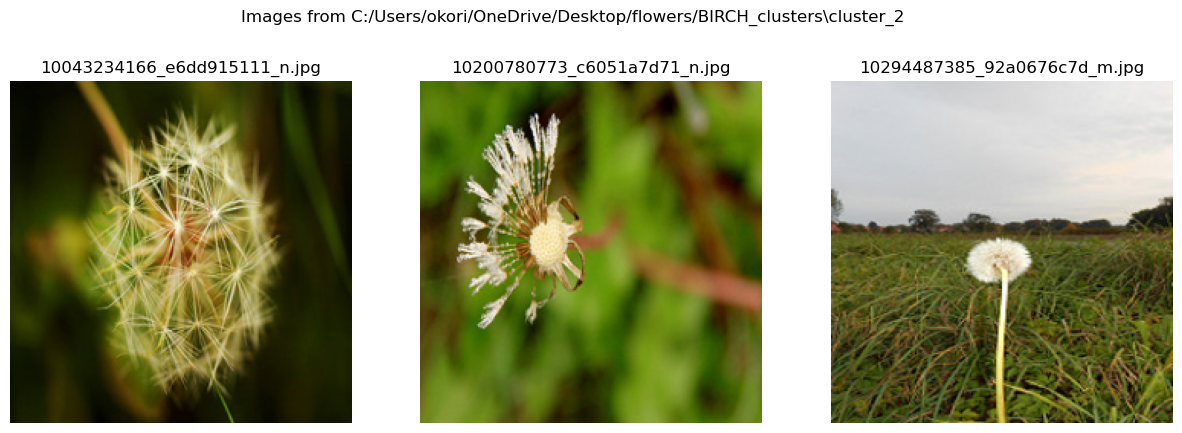

In [29]:
#visualization for BIRCH Model
folder_path = 'C:/Users/okori/OneDrive/Desktop/flowers/BIRCH_clusters'  
visualize_images_from_subfolders(folder_path)

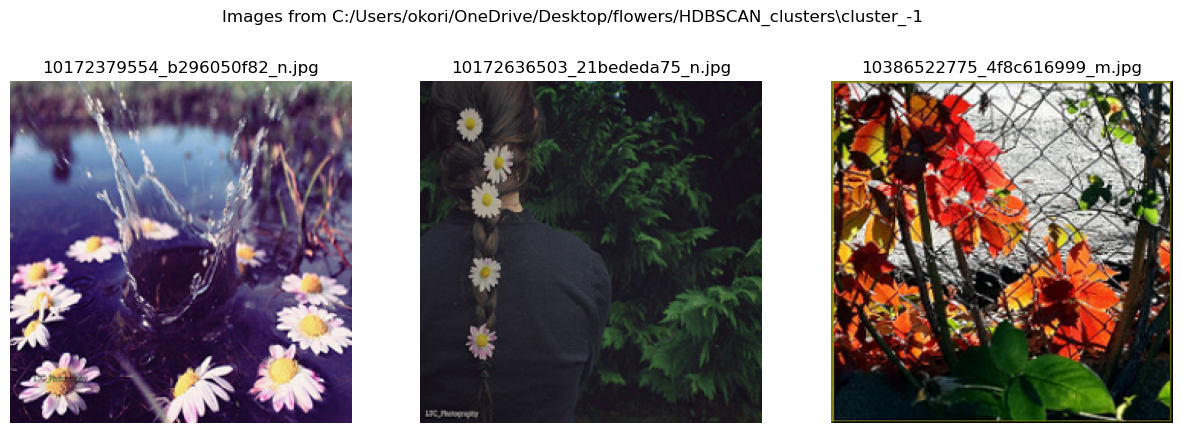

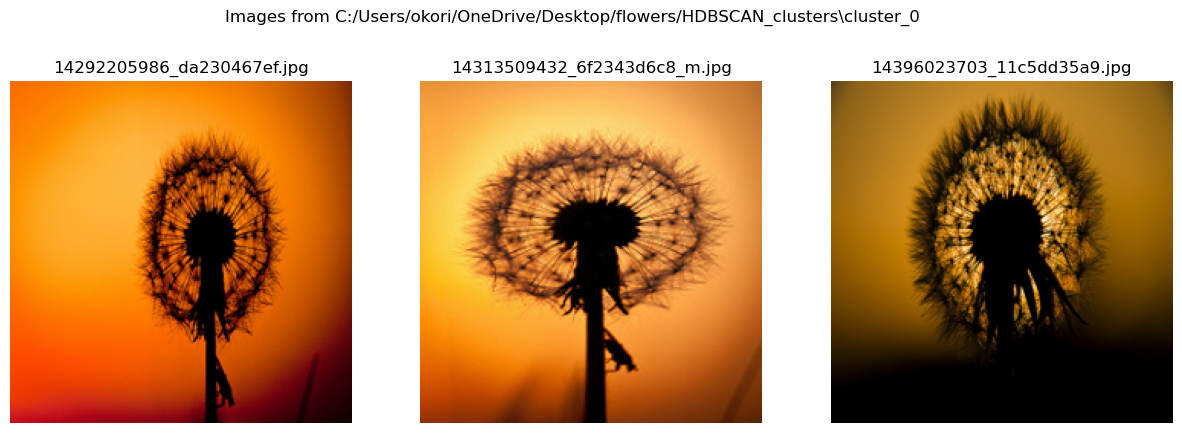

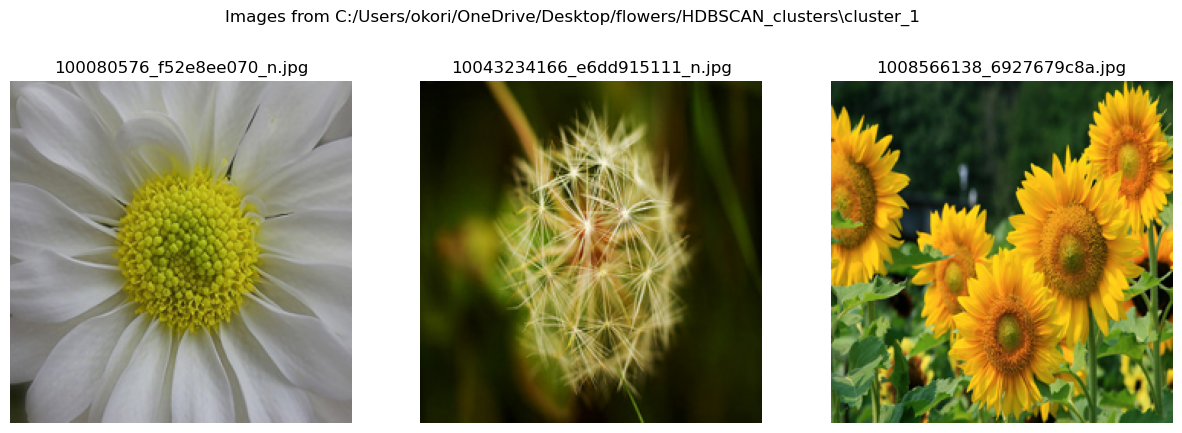

In [30]:
#visualization for HDBSCAN Model
folder_path = 'C:/Users/okori/OneDrive/Desktop/flowers/HDBSCAN_clusters'  
visualize_images_from_subfolders(folder_path)

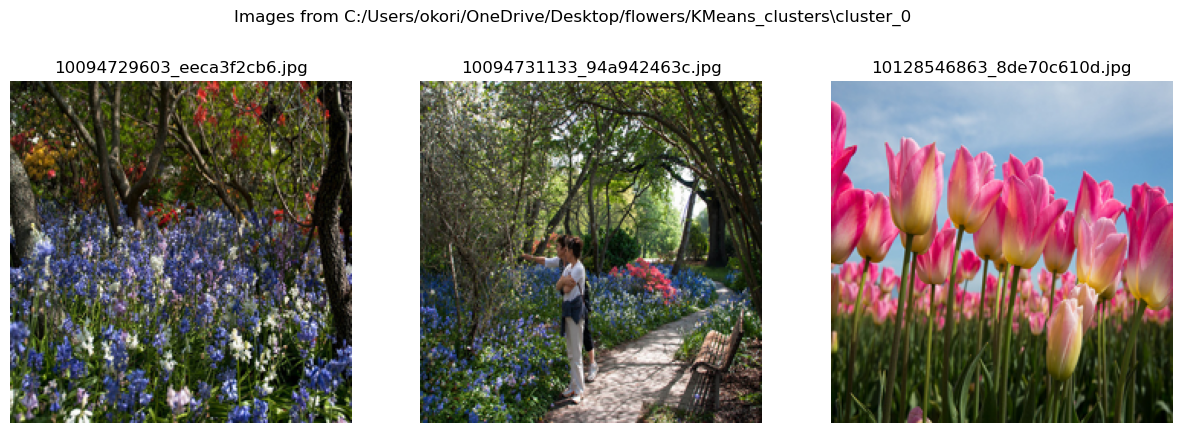

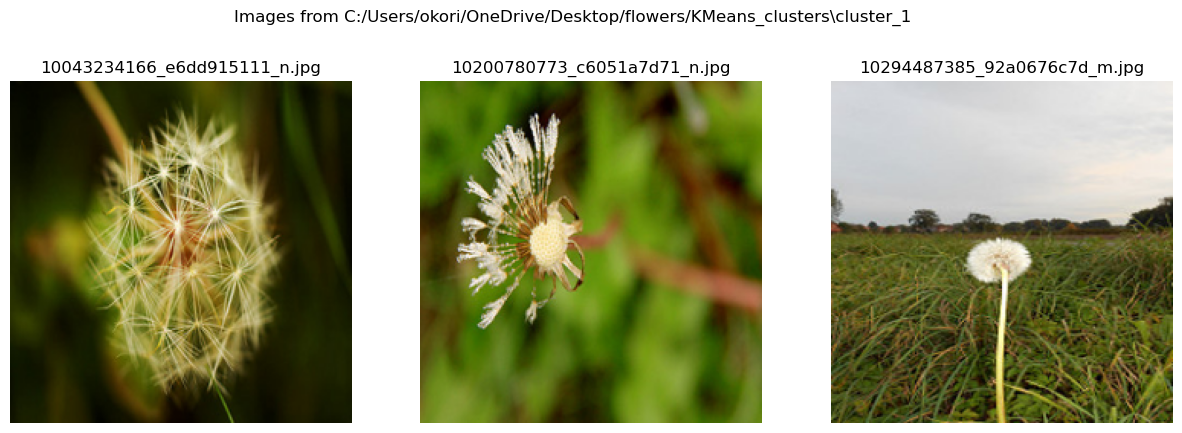

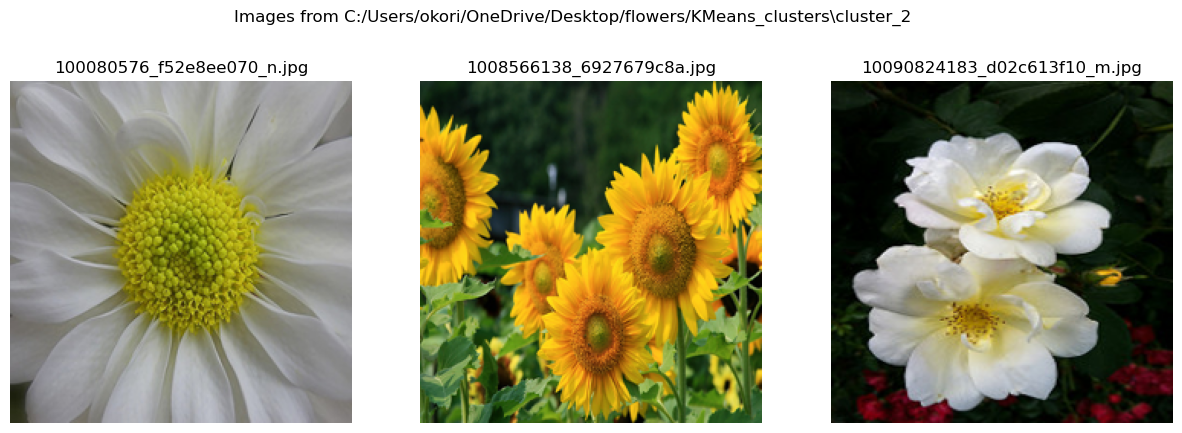

In [31]:
#visualization for KMeans Model
folder_path = 'C:/Users/okori/OneDrive/Desktop/flowers/KMeans_clusters'  
visualize_images_from_subfolders(folder_path)

In [6]:
# Calculate silhouette scores for each clustering algorithm
kmeans_silhouette_score = silhouette_score(reduced_features, kmeans_labels)
birch_silhouette_score = silhouette_score(reduced_features, birch_labels)
hdbscan_silhouette_score = silhouette_score(reduced_features, hdbscan_labels)

# Print the silhouette scores for each clustering algorithm
print("\nSilhouette Scores:")
print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")
print(f"BIRCH Silhouette Score: {birch_silhouette_score}")
print(f"HDBSCAN Silhouette Score: {hdbscan_silhouette_score}")

# Create a comparison table
comparison_table = {
    "Algorithm": ["K-Means", "BIRCH", "HDBSCAN"],
    "Silhouette Score": [kmeans_silhouette_score, birch_silhouette_score, hdbscan_silhouette_score]
}

# Print the comparison table
print("\nComparison Table:")
for key in comparison_table.keys():
    print(f"{key:20}", end="")
    for value in comparison_table[key]:
        print(f"{value:20}", end="")
    print()


Silhouette Scores:
K-Means Silhouette Score: 0.102769635617733
BIRCH Silhouette Score: 0.08751542866230011
HDBSCAN Silhouette Score: 0.11743059009313583

Comparison Table:
Algorithm           K-Means             BIRCH               HDBSCAN             
Silhouette Score       0.102769635617733 0.08751542866230011 0.11743059009313583
